# Introduction

Natural Language Processing (NLP) is a technology that allows computers to process natural language which is used by humans in everyday life. In this section, we will consider the use of natural language as input for machine learning.


Since many machine learning methods assume the input of numerical data (quantitative variables), it is necessary to convert natural language text data into numerical data. This is called natural language vectorization. Various methods have been considered so that the characteristics of text data can be captured well during vectorization, and we will learn them in this Sprint.

# Prepare Dataset

In [2]:
#Download IMDB to the current folder
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
# Unzip
!tar zxf aclImdb_v1.tar.gz
# aclImdb / train / unsup is unlabeled and removed
!rm -rf aclImdb/train/unsup
# Show IMDB dataset description
!cat aclImdb/README

--2021-12-02 05:53:28--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  39.9MB/s    in 2.0s    

2021-12-02 05:53:31 (39.9 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]

Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an a

In [3]:
from sklearn.datasets import load_files
train_review = load_files('./aclImdb/train/', encoding='utf-8')
x_train, y_train = train_review.data, train_review.target
test_review = load_files('./aclImdb/test/', encoding='utf-8')
x_test, y_test = test_review.data, test_review.target
# Display of the correspondence between 0, 1 of the label and the meaning
print(train_review.target_names)


['neg', 'pos']


In [4]:
print("x : {}".format(x_train[0]))


x : Zero Day leads you to think, even re-think why two boys/young men would do what they did - commit mutual suicide via slaughtering their classmates. It captures what must be beyond a bizarre mode of being for two humans who have decided to withdraw from common civility in order to define their own/mutual world via coupled destruction.<br /><br />It is not a perfect movie but given what money/time the filmmaker and actors had - it is a remarkable product. In terms of explaining the motives and actions of the two young suicide/murderers it is better than 'Elephant' - in terms of being a film that gets under our 'rationalistic' skin it is a far, far better film than almost anything you are likely to see. <br /><br />Flawed but honest with a terrible honesty.


# BOW

In [5]:
mini_dataset = \
  ["This movie is very good.",
  "This film is a good",
  "Very bad. Very, very bad."]

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'(?u)\b\w+\b')
bow = (vectorizer.fit_transform(mini_dataset)).toarray()
#Put together in #DataFrame
df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


### N-gram

In [7]:
#Specify the range of n-gram used in # ngram_range
vectorizer = CountVectorizer(ngram_range=(2, 2), token_pattern=r'(?u)\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


# Problem 1
Scratch BOW

In [8]:
import re
import pandas as pd
import numpy as np
def bow(language, n_gram=1): 
  # generate bow representation of a language
  vocabulary = generate_vocabulary(language, n_gram)

  bow = pd.DataFrame(np.zeros(
      (len(language), len(vocabulary))),
      columns=vocabulary,
  )
  for idx, document in enumerate(language):
    tokens = tokenize_n_gram(document,n_gram)
    for token in tokens:
      bow[token][idx] += 1
  return bow.astype(np.int8)

def generate_vocabulary(language, n_gram): 
  # get a sorted list of tokens from a language
  vocabulary = set()
  for document in language:
    vocabulary.update(tokenize_n_gram(document,n_gram))
  return sorted(list(vocabulary))

def tokenize_n_gram(doc, n): 
  # merge tokens into n-grams tokens
  single_tokens = tokenize(doc)
  return_tokens = []
  last_index = len(single_tokens) - n
  for idx, token in enumerate(single_tokens):
    if idx > last_index: break
    return_tokens.append(' '.join(single_tokens[idx:idx+n]))
  return return_tokens

def tokenize(doc): 
  #lowercase and tokenize single tokens by regular expression
  return re.findall("[A-Z]{2,}(?![a-z])|[A-Z][a-z]+(?=[A-Z])|[\'\w\-]+",doc.lower())


In [9]:
bow(mini_dataset)

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


In [10]:
bow(mini_dataset,2)

,a good,bad very,film is,is a,is very,movie is,this film,this movie,very bad,very good,very very
0,0,0,0,0,1,1,0,1,0,1,0
1,1,0,1,1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,2,0,1


In [11]:
language = [
  'This movie is SOOOO funny!!!',
  'What a movie! I never',
  'best movie ever!!!!! this movie',
]
bow(language)

,a,best,ever,funny,i,is,movie,never,soooo,this,what
0,0,0,0,1,0,1,1,0,1,1,0
1,1,0,0,0,1,0,1,1,0,0,1
2,0,1,1,0,0,0,2,0,0,1,0


In [12]:
bow(language,3)

,a movie i,best movie ever,ever this movie,is soooo funny,movie ever this,movie i never,movie is soooo,this movie is,what a movie
0,0,0,0,1,0,0,1,1,0
1,1,0,0,0,0,1,0,0,1
2,0,1,1,0,1,0,0,0,0


# TF-IDF

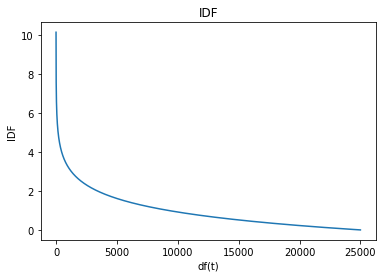

In [13]:
import numpy as np
import matplotlib.pyplot as plt
n_samples = 25000
idf = np.log(n_samples/np.arange(1,n_samples))
plt.title("IDF")
plt.xlabel("df(t)")
plt.ylabel("IDF")
plt.plot(idf)
plt.show()

# Stop word

In [14]:
vectorizer = CountVectorizer(stop_words=["is"], token_pattern=r'\b\w+\b')
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,a,bad,film,good,movie,this,very
0,0,0,0,1,1,1,1
1,1,0,1,1,0,1,0
2,0,2,0,0,0,0,3


In [15]:
# Download Stopword for the first time
import nltk
stop_words = nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print("stop word : {}".format(stop_words)) # 'i', 'me', 'my', ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
stop word : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any',

In [16]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b', max_features = 5)
bow_train = (vectorizer.fit_transform(mini_dataset)).toarray()
df = pd.DataFrame(bow_train, columns=vectorizer.get_feature_names())
display(df)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,bad,good,is,this,very
0,0,1,1,1,1
1,0,1,1,1,0
2,2,0,0,0,3


# Problem 2
TF-IDF Calculation

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(
    max_features = 5000,
    norm = None,
)

bow_train = tfidf_vectorizer.fit_transform(x_train).toarray()
df = pd.DataFrame(bow_train, columns = tfidf_vectorizer.get_feature_names())
df

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,10,100,11,12,13,13th,14,15,16,17,18,1930,1930s,1933,1940,1950,1950s,1960,1960s,1968,1970,1970s,1972,1973,1980,1980s,1983,1984,1987,1990,1996,1997,1999,1st,20,2000,2001,2002,...,worthy,would,wouldn,wound,wounded,wow,wrap,wrapped,wreck,wrestling,write,writer,writers,writes,writing,written,wrong,wrote,wwii,ya,yeah,year,years,yelling,yellow,yes,yesterday,yet,york,you,young,younger,your,yourself,youth,zero,zizek,zombie,zombies,zone
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,2.123109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.212992,6.437303,0.0,0.000000,0.000000,0.0,5.35835,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.070496,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,8.032479,0.000000,0.0,0.000000,4.315427,0.0,0.00000,0.0,0.0,0.0,0.0
2,0.0,0.0,2.998676,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
3,0.0,0.0,2.998676,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,3.212992,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,5.869176,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.606496,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.000000,5.127735,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,41.901218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,6.369327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,3.838427,0.0,0.0,0.0,0.0,0.0,3.554168,0.0,0.0,0.0,0.0,0.0,0.000000,9.393903,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.210948,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,3.397815,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
24997,0.0,0.0,2.998676,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.355986,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000

# Problem 3
Learning using TF-IDF

## Let's test learning with some different configs
- Unigram + sklearn stopword
- Unigram + nltk stopword
- Unigram + nltk stopword + bigger vocab
- Bigram + nltk
- Bigram + nltk + bigger vocab
- Trigram + nltk + bigger vocab

In [18]:
default_features = 5000
more_features = 10000
nltk_stopwords = stop_words=stopwords.words('english')

#uni
v1 = TfidfVectorizer(max_features = default_features,norm = None)
v2 = TfidfVectorizer(max_features = default_features,norm = None, stop_words=nltk_stopwords)
v3 = TfidfVectorizer(max_features = more_features,norm = None, stop_words=nltk_stopwords)
#binary
v4 = TfidfVectorizer(max_features = default_features,ngram_range=(2,2),norm = None,stop_words=nltk_stopwords)
v5 = TfidfVectorizer(max_features = more_features,ngram_range=(2,2),norm = None,stop_words=nltk_stopwords)
# triplet :V
v6 = TfidfVectorizer(max_features = more_features,ngram_range=(3,3),norm = None,stop_words=nltk_stopwords)


In [19]:
def tf_idf_process(data, vectorizer):
  bow = vectorizer.fit_transform(data).toarray()
  return pd.DataFrame(bow, columns = vectorizer.get_feature_names())

In [20]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape, y_train.shape

((25000,), (25000,))

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
split_seed = 0 # to make sure data split is same across calls
Y_train, Y_val = train_test_split(y_train, random_state=split_seed, test_size=0.2)
def test_tfidf_vectorizer(vectorizer):
  model = SGDClassifier()
  processed_x = tf_idf_process(x_train, vectorizer)
  X_train, X_val = train_test_split(processed_x, random_state= split_seed, test_size=0.2)
  
  model.fit(X_train,Y_train)
  print(f'Result with: {vectorizer}')
  print(classification_report(Y_val, model.predict(X_val)))


In [22]:
test_tfidf_vectorizer(v1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Result with: TfidfVectorizer(max_features=5000, norm=None)
              precision    recall  f1-score   support

           0       0.82      0.85      0.83      2429
           1       0.85      0.82      0.84      2571

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000



In [23]:
test_tfidf_vectorizer(v2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Result with: TfidfVectorizer(max_features=5000, norm=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])
              precision    recall  f1-score   support

           0       0.81      0.84      0.83      2429
           1       0.84      0.82      0.83      2571

    accuracy                           0.83      5000
   macro avg       0.83      0.83      0.83      5000
weighted avg       0.83      0.83      0.83      5000



In [24]:
test_tfidf_vectorizer(v3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Result with: TfidfVectorizer(max_features=10000, norm=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2429
           1       0.85      0.86      0.86      2571

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [25]:
test_tfidf_vectorizer(v4)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Result with: TfidfVectorizer(max_features=5000, ngram_range=(2, 2), norm=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])
              precision    recall  f1-score   support

           0       0.74      0.76      0.75      2429
           1       0.77      0.75      0.76      2571

    accuracy                           0.76      5000
   macro avg       0.76      0.76      0.76      5000
weighted avg       0.76      0.76      0.76      5000



In [26]:
test_tfidf_vectorizer(v5)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Result with: TfidfVectorizer(max_features=10000, ngram_range=(2, 2), norm=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])
              precision    recall  f1-score   support

           0       0.79      0.78      0.78      2429
           1       0.79      0.81      0.80      2571

    accuracy                           0.79      5000
   macro avg       0.79      0.79      0.79      5000
weighted avg       0.79      0.79      0.79      5000



In [27]:
test_tfidf_vectorizer(v6)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Result with: TfidfVectorizer(max_features=10000, ngram_range=(3, 3), norm=None,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])
              precision    recall  f1-score   support

           0       0.68      0.61      0.64      2429
           1       0.66      0.73      0.70      2571

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



## Conclusion
- Incresing max feature generally means better performance
- Large n-gram does not means better result since n3 < n2 < n1
- nltk's stopword is better than sklearn's default
- Best performance is from unigram model with nltk stopword and 10000 features

# Problem 4
Scratch Mouting TF-IDF

### Sample data

In [28]:
sample_bow = bow(mini_dataset)
sample_bow

,a,bad,film,good,is,movie,this,very
0,0,0,0,1,1,1,1,1
1,1,0,1,1,1,0,1,0
2,0,2,0,0,0,0,0,3


### Normal implementation

In [29]:
def tf_idf(bow):
  return tf(bow)*idf(bow)

def tf(bow):
  doc_word_count = bow.sum(axis = 0)
  return bow/doc_word_count
def idf(bow):
  document_count = len(bow)
  doc_freq = (bow > 0).sum(axis = 0)
  return np.log(document_count / doc_freq)

print('tf')
display(tf(sample_bow))
print('idf')
display(idf(sample_bow))
print('tf-idf')
tf_idf(sample_bow)

tf


,a,bad,film,good,is,movie,this,very
0,0.0,0.0,0.0,0.5,0.5,1.0,0.5,0.25
1,1.0,0.0,1.0,0.5,0.5,0.0,0.5,0.00
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.75


idf


a        1.098612
bad      1.098612
film     1.098612
good     0.405465
is       0.405465
movie    1.098612
this     0.405465
very     0.405465
dtype: float64

tf-idf


,a,bad,film,good,is,movie,this,very
0,0.000000,0.000000,0.000000,0.202733,0.202733,1.098612,0.202733,0.101366
1,1.098612,0.000000,1.098612,0.202733,0.202733,0.000000,0.202733,0.000000
2,0.000000,1.098612,0.000000,0.000000,0.000000,0.000000,0.000000,0.304099


### Sklearn implementation

In [30]:
def sk_tf_idf(bow):
  return bow*idf(bow)

def sk_idf(bow):
  document_count = len(bow)
  doc_freq = (bow > 0).sum(axis = 0)
  return np.log((1 + document_count) / (1 +doc_freq)) + 1

print('sk-tf is bow itself')
print('sk-idf')
display(sk_idf(sample_bow))
print('sk-tf-idf')
sk_tf_idf(sample_bow)

sk-tf is bow itself
sk-idf


a        1.693147
bad      1.693147
film     1.693147
good     1.287682
is       1.287682
movie    1.693147
this     1.287682
very     1.287682
dtype: float64

sk-tf-idf


,a,bad,film,good,is,movie,this,very
0,0.000000,0.000000,0.000000,0.405465,0.405465,1.098612,0.405465,0.405465
1,1.098612,0.000000,1.098612,0.405465,0.405465,0.000000,0.405465,0.000000
2,0.000000,2.197225,0.000000,0.000000,0.000000,0.000000,0.000000,1.216395


# Word2Vec
- Skip Gram
- CBOW

In [31]:
from gensim.models import Word2Vec
sentences = [['this', 'movie', 'is', 'very', 'good'], ['this', 'film', 'is', 'a', 'good'], ['very', 'bad', 'very', 'very', 'bad']]
model = Word2Vec(min_count=1, size=10) # Set the number of dimensions to 10
model.build_vocab(sentences) # Preparation
model.train(sentences, total_examples=model.corpus_count, epochs=model.iter) #Learning

print("List of vocabulary : {}".format(model.wv.vocab.keys()))
for vocab in model.wv.vocab.keys():
  print("Vector of {}: \n{}".format(vocab, model.wv[vocab]))

List of vocabulary : dict_keys(['this', 'movie', 'is', 'very', 'good', 'film', 'a', 'bad'])
Vector of this: 
[ 0.0347033  -0.0108839   0.00939664  0.02599065 -0.00795878  0.01106014
 -0.03899637  0.01180809 -0.00041707 -0.00622833]
Vector of movie: 
[ 0.00530475  0.04624502 -0.01973253 -0.04870541  0.0455208  -0.03643534
 -0.04861472 -0.01145713 -0.02969605  0.0128316 ]
Vector of is: 
[ 0.00337405  0.00242398  0.04245387 -0.03263632 -0.04609981 -0.04055002
  0.02102622  0.00079006  0.04075063 -0.02518496]
Vector of very: 
[-0.01786933  0.03962423 -0.03738825 -0.0312345   0.03659826  0.01319895
 -0.02083636  0.01471743 -0.03636358 -0.01000765]
Vector of good: 
[-0.02003436  0.01229765  0.00106613 -0.01715388 -0.03783088  0.03357565
  0.03833717  0.01342343  0.01359603  0.02588305]
Vector of film: 
[ 0.01192167 -0.01436816  0.0245849   0.04778628  0.01766687 -0.02789987
  0.002364   -0.04361147 -0.03727317 -0.03474575]
Vector of a: 
[ 0.02822335 -0.01821532  0.00466645 -0.03055382  0.023

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  """


In [32]:
model.wv.most_similar(positive="good", topn=3)


[('is', 0.22395583987236023),
 ('very', -0.1401732861995697),
 ('a', -0.23664245009422302)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


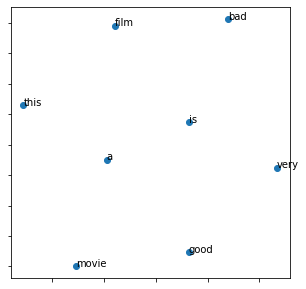

In [33]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=5000, random_state=23)
vectors_tsne = tsne_model.fit_transform(model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

# Problem 5
Corpus Treatment

In [34]:
x_train, y_train,x_test, y_test = [np.array(x) for x in [x_train, y_train,x_test, y_test]]
[x.shape for x in [x_train, y_train,x_test, y_test]]

[(25000,), (25000,), (25000,), (25000,)]

In [35]:
from nltk.tokenize import word_tokenize
import string

nltk.download('punkt')

def process(sentence):
  lowercase = sentence.lower()
  removed_punctuation = re.sub(r'[^\w\s]','',lowercase)
  tokened = word_tokenize(removed_punctuation)
  return tokened

print(process(x_train[0]))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 'rethink', 'why', 'two', 'boysyoung', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'their', 'classmates', 'it', 'captures', 'what', 'must', 'be', 'beyond', 'a', 'bizarre', 'mode', 'of', 'being', 'for', 'two', 'humans', 'who', 'have', 'decided', 'to', 'withdraw', 'from', 'common', 'civility', 'in', 'order', 'to', 'define', 'their', 'ownmutual', 'world', 'via', 'coupled', 'destructionbr', 'br', 'it', 'is', 'not', 'a', 'perfect', 'movie', 'but', 'given', 'what', 'moneytime', 'the', 'filmmaker', 'and', 'actors', 'had', 'it', 'is', 'a', 'remarkable', 'product', 'in', 'terms', 'of', 'explaining', 'the', 'motives', 'and', 'actions', 'of', 'the', 'two', 'young', 'suicidemurderers', 'it', 'is', 'better', 'than', 'elephant', 'in', 'terms', 'of', 'being', 'a', 'film', 'that', 'gets', '

In [36]:
tokenized_x_train = [process(x) for x in x_train]
tokenized_x_test = [process(x) for x in x_test]

In [37]:
print(tokenized_x_train[0:2])

[['zero', 'day', 'leads', 'you', 'to', 'think', 'even', 'rethink', 'why', 'two', 'boysyoung', 'men', 'would', 'do', 'what', 'they', 'did', 'commit', 'mutual', 'suicide', 'via', 'slaughtering', 'their', 'classmates', 'it', 'captures', 'what', 'must', 'be', 'beyond', 'a', 'bizarre', 'mode', 'of', 'being', 'for', 'two', 'humans', 'who', 'have', 'decided', 'to', 'withdraw', 'from', 'common', 'civility', 'in', 'order', 'to', 'define', 'their', 'ownmutual', 'world', 'via', 'coupled', 'destructionbr', 'br', 'it', 'is', 'not', 'a', 'perfect', 'movie', 'but', 'given', 'what', 'moneytime', 'the', 'filmmaker', 'and', 'actors', 'had', 'it', 'is', 'a', 'remarkable', 'product', 'in', 'terms', 'of', 'explaining', 'the', 'motives', 'and', 'actions', 'of', 'the', 'two', 'young', 'suicidemurderers', 'it', 'is', 'better', 'than', 'elephant', 'in', 'terms', 'of', 'being', 'a', 'film', 'that', 'gets', 'under', 'our', 'rationalistic', 'skin', 'it', 'is', 'a', 'far', 'far', 'better', 'film', 'than', 'almost'

# Problem 6
Learning Word2Vec

In [38]:
embed_model = Word2Vec(min_count=1, size=10) #winoow = 5, cbow
embed_model.build_vocab(tokenized_x_train)
embed_model.train(tokenized_x_train, total_examples=model.corpus_count, epochs=model.iter) #Learning

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  This is separate from the ipykernel package so we can avoid doing imports until


(22061115, 29109630)

# Problem 7
Vector visualization

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 121041 samples in 0.240s...
[t-SNE] Computed neighbors for 121041 samples in 131.419s...
[t-SNE] Computed conditional probabilities for sample 1000 / 121041
[t-SNE] Computed conditional probabilities for sample 2000 / 121041
[t-SNE] Computed conditional probabilities for sample 3000 / 121041
[t-SNE] Computed conditional probabilities for sample 4000 / 121041
[t-SNE] Computed conditional probabilities for sample 5000 / 121041
[t-SNE] Computed conditional probabilities for sample 6000 / 121041
[t-SNE] Computed conditional probabilities for sample 7000 / 121041
[t-SNE] Computed conditional probabilities for sample 8000 / 121041
[t-SNE] Computed conditional probabilities for sample 9000 / 121041
[t-SNE] Computed conditional probabilities for sample 10000 / 121041
[t-SNE] Computed conditional probabilities for sample 11000 / 121041
[t-SNE] Computed conditional probabilities for sample 12000 / 121041
[t-SNE] Computed conditional prob

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 120.743652
[t-SNE] KL divergence after 251 iterations: 179769313486231570814527423731704356798070567525844996598917476803157260780028538760589558632766878171540458953514382464234321326889464182768467546703537516986049910576551282076245490090389328944075868508455133942304583236903222948165808559332123348274797826204144723168738177180919299881250404026184124858368.000000


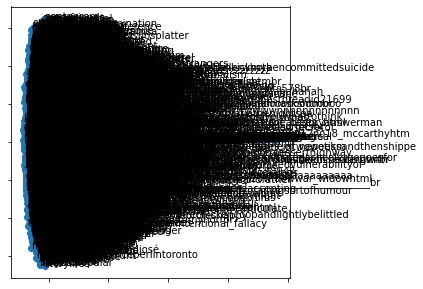

In [69]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
vocabs = embed_model.wv.vocab.keys()
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=250, random_state=23, n_jobs=-1, verbose=1)
vectors_tsne = tsne_model.fit_transform(embed_model[vocabs])
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

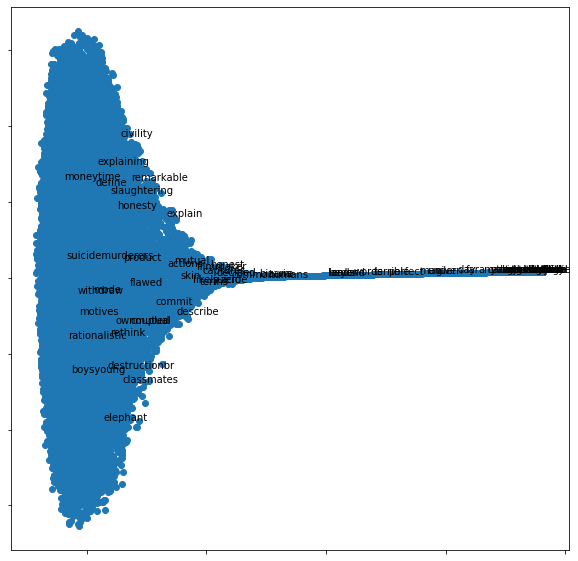

In [81]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1])
for i, word in enumerate(list(vocabs)[0:100]):
    plt.annotate(word, xy=(vectors_tsne[i, 0], vectors_tsne[i, 1]))
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.show()

In [41]:
model.wv.most_similar(positive="good", topn=10)


[('is', 0.22395583987236023),
 ('very', -0.1401732861995697),
 ('a', -0.23664245009422302),
 ('bad', -0.26386722922325134),
 ('this', -0.4325699508190155),
 ('movie', -0.4486181139945984),
 ('film', -0.6525868773460388)]

In [42]:
model.wv.most_similar(positive="bad", topn=10)


[('a', 0.6670490503311157),
 ('movie', 0.5012365579605103),
 ('very', 0.29376351833343506),
 ('film', 0.06371670216321945),
 ('this', -0.19650281965732574),
 ('good', -0.26386722922325134),
 ('is', -0.4575291872024536)]